## EDA assignment component 4

In [18]:

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [21]:
# Step 2: Load the Online Retail dataset
file_path = "C:\\Users\\lothar\\OneDrive\\Desktop\\python and data sets\\data set\\Online Retail.xlsx"  
df = pd.read_excel(file_path)

# Display first 5 rows of the dataset
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 📁 About the Dataset

The **Online Retail** dataset is a transactional data record from a UK-based online retailer. The company sells unique all-occasion giftware to customers globally. This dataset contains **real-world purchases** made between **December 1, 2010 and December 9, 2011**.

### Key Columns:
- `InvoiceNo`: Unique identifier for each transaction  
- `StockCode`: Product/item code  
- `Description`: Description of the product  
- `Quantity`: Number of items purchased per transaction  
- `InvoiceDate`: Timestamp of the transaction  
- `UnitPrice`: Price per product (in British Pounds)  
- `CustomerID`: ID of the customer (if available)  
- `Country`: The country where the customer resides  

This dataset is commonly used for:
- Retail analytics  
- Customer segmentation  
- Purchase behavior analysis  


## 🎯 Goals of the Assignment

The goal of this lab assignment is to perform **Exploratory Data Analysis (EDA)** on the Online Retail dataset by:

- Understanding and cleaning the dataset  
- Identifying and handling missing values and duplicate records  
- Performing data manipulation techniques (e.g., grouping, filtering, feature engineering)  
- Applying normalization techniques on numerical data  
- Visualizing trends, anomalies, and patterns  
- Drawing actionable insights from transactional data  


## 📌 Objectives

This assignment will help demonstrate the following skills:

1. Apply EDA using Python libraries such as Pandas, Matplotlib, and Seaborn  
2. Clean and prepare data by handling:
   - Missing values  
   - Duplicate rows  
   - Inconsistent formats  
3. Perform **data manipulation techniques** like grouping, aggregation, and filtering  
4. Apply **normalization techniques** (e.g., Min-Max scaling, Standardization)  
5. Visualize the dataset effectively to aid decision-making and derive insights  


In [27]:
print("Column Names:", df.columns.tolist())

Column Names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [29]:
df.shape

(541909, 8)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [33]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 🧾 Initial Data Exploration

- The dataset contains approximately **540,000+ rows** and **8 columns**.
- Key columns:
  - `Quantity` and `UnitPrice` are **numerical features**.
  - `InvoiceDate`, `Description`, and `Country` are **textual or categorical**.
  - `CustomerID` has **missing values**, which must be addressed during cleaning.
- From `df.info()`, we can observe the **data types**, and which columns might require **type conversion** or **missing value treatment**.
- The `describe()` function gives basic statistical measures like mean, std, min, and percentiles for numerical columns.  


In [36]:
# Check for missing values in each column
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [38]:
# Check percentage of missing values (optional for more insight)
(df.isnull().sum() / len(df)) * 100


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [40]:
# Drop rows where CustomerID is missing (optional decision)
df_cleaned = df.dropna(subset=['CustomerID'])

# Confirm removal
df_cleaned.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## data is cleaned here , we have dropped the rows where customer id is missing

In [43]:
# Check for duplicate rows
df_cleaned.duplicated().sum()


5225

In [45]:
# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Confirm removal
df_cleaned.shape


(401604, 8)

## 🧹 Handling Missing Values and Duplicates

- The `CustomerID` column contains a significant number of **missing values**.  
  - Since `CustomerID` is crucial for customer-based analysis, we chose to **drop rows where it is missing**.  
- Other columns do not have significant missing data.
- We also checked for **duplicate records** in the dataset:
  - Duplicate rows can skew analysis, especially in transactional data.
  - Removed all duplicated records to ensure data integrity.
- After cleaning, we are left with a refined dataset ready for analysis.


In [48]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [50]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
# Create a new column for TotalAmount = Quantity × UnitPrice
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group data by Country to see total revenue
country_revenue = df_cleaned.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

# Display top 10 countries by revenue
country_revenue.head(10)


Country
United Kingdom    6747156.154
Netherlands        284661.540
EIRE               250001.780
Germany            221509.470
France             196626.050
Australia          137009.770
Switzerland         55739.400
Spain               54756.030
Belgium             40910.960
Sweden              36585.410
Name: TotalAmount, dtype: float64

In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


## 🔧 Basic Data Manipulation

- Created a new feature `TotalAmount` which is calculated as:  
  [{TotalAmount} = PRICE * QUANTITY]  
  This represents the **revenue generated per transaction**.

- Grouped data by `Country` and summed up `TotalAmount` to analyze which countries contributed the most revenue.

- This helps identify **top-performing markets** for the business.

- The top 10 countries (excluding UK) can give insights into potential international opportunities.


In [66]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


C:\Users\lothar\AppData\Local\Temp\ipykernel_17528\2323623610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


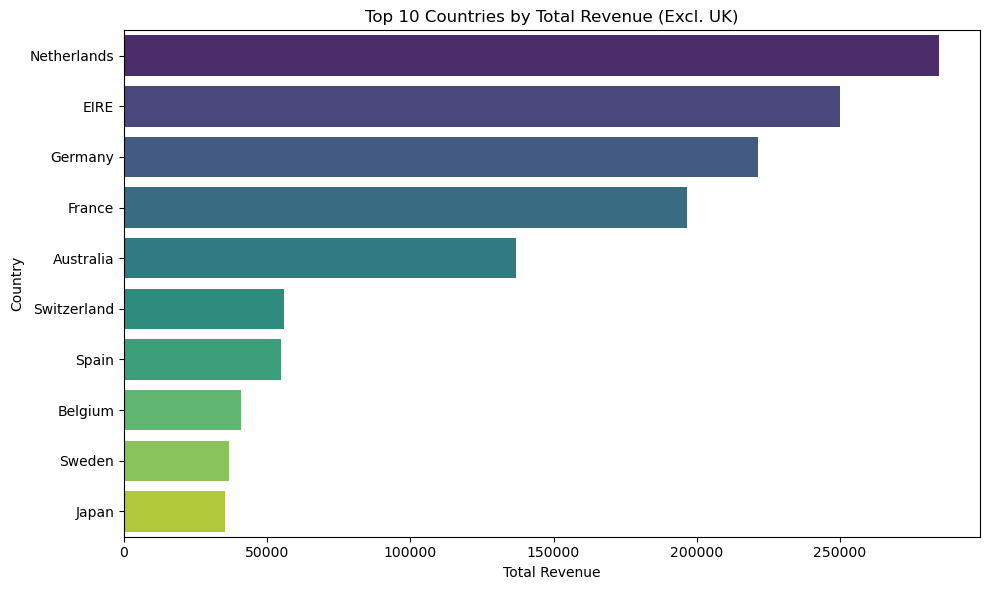

In [68]:
# Bar plot for top 10 countries (excluding UK)
top_countries = country_revenue.drop('United Kingdom').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Total Revenue (Excl. UK)')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


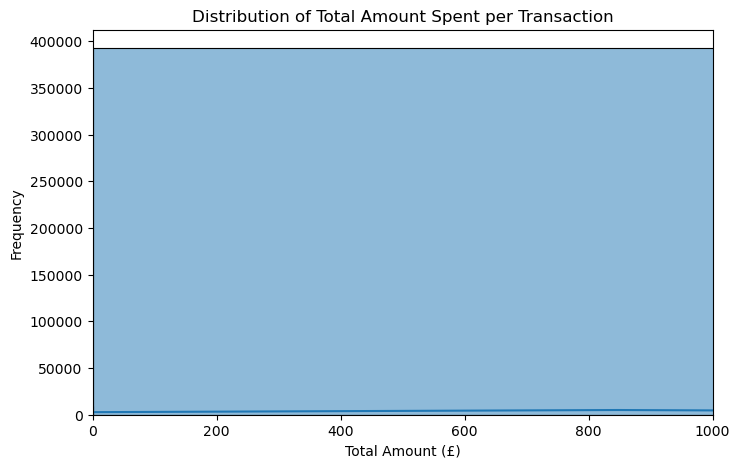

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['TotalAmount'], bins=50, kde=True)
plt.xlim(0, 1000)  # limit to remove extreme outliers
plt.title('Distribution of Total Amount Spent per Transaction')
plt.xlabel('Total Amount (£)')
plt.ylabel('Frequency')
plt.show()


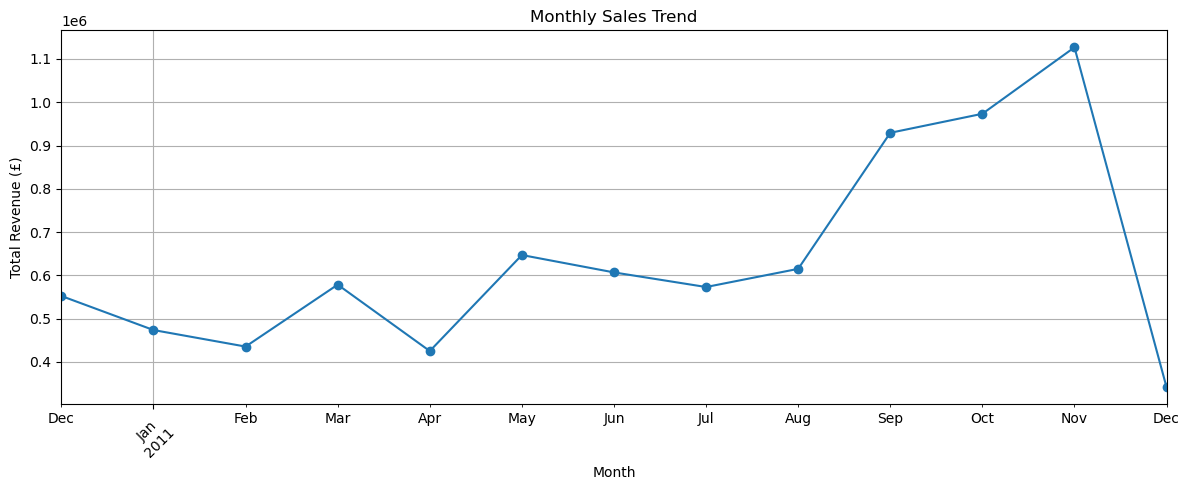

In [72]:
# Convert InvoiceDate to datetime if not already
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year-month for grouping
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

monthly_sales = df_cleaned.groupby('InvoiceMonth')['TotalAmount'].sum()

# Line plot
plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 Visual Exploration

1. **Bar Plot – Top Countries by Revenue**  
   - Shows the top 10 countries (excluding UK) based on total revenue.
   - Highlights international demand and geographic performance.

2. **Histogram – Distribution of TotalAmount**  
   - Reveals the frequency of transaction amounts.
   - Most transactions fall under £1000, with some high-value outliers.

3. **Line Plot – Monthly Sales Trend**  
   - Displays revenue trends over time.
   - Helps identify **seasonal patterns**, spikes, or drops in sales.


## here the histogram is not making any sense

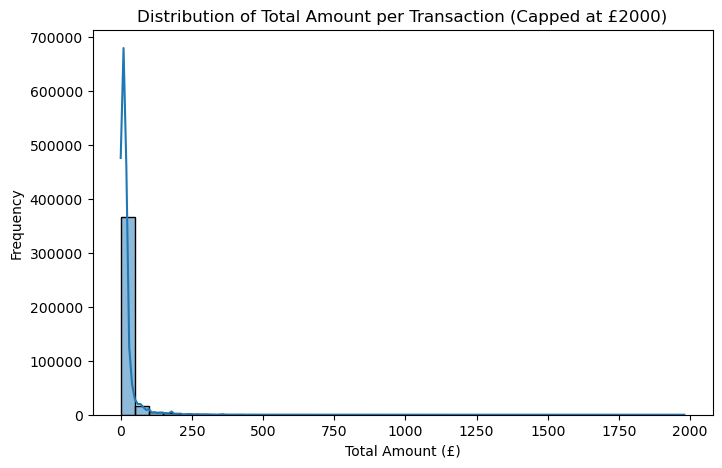

In [76]:
# Filter out negative or zero TotalAmount and cap at 2000 for better visibility
filtered_total = df_cleaned[(df_cleaned['TotalAmount'] > 0) & (df_cleaned['TotalAmount'] < 2000)]

plt.figure(figsize=(8,5))
sns.histplot(filtered_total['TotalAmount'], bins=40, kde=True)
plt.title('Distribution of Total Amount per Transaction (Capped at £2000)')
plt.xlabel('Total Amount (£)')
plt.ylabel('Frequency')
plt.show()


## 📊 Histogram Update – Distribution of TotalAmount

- The original histogram included refunds (negative values) and high-value outliers, which distorted the view.
- We improved clarity by:
  - Filtering out zero and negative transaction values (refunds)
  - Capping the plot at £2000 to reduce the impact of outliers
- This updated distribution shows that most transactions are **below £500**, with a long tail of higher-value purchases.


## the histogram here is heavily right skewed, we cannot infer any significant insight from here

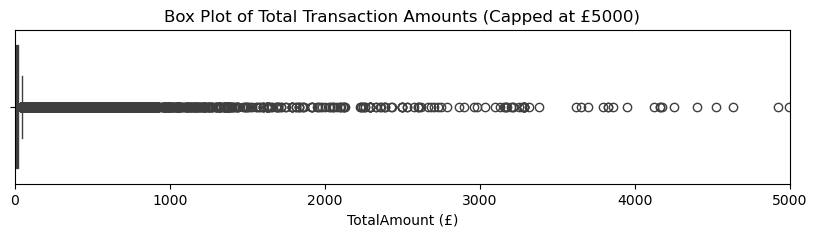

In [80]:
plt.figure(figsize=(10,2))
sns.boxplot(x=df_cleaned['TotalAmount'])
plt.xlim(0, 5000)  # limit to visualize IQR clearly
plt.title('Box Plot of Total Transaction Amounts (Capped at £5000)')
plt.xlabel('TotalAmount (£)')
plt.show()


C:\Users\lothar\AppData\Local\Temp\ipykernel_17528\949680481.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='crest')


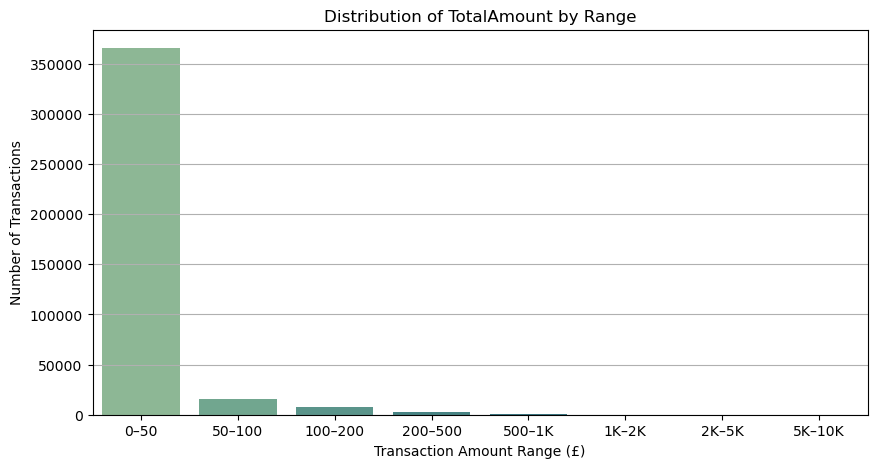

In [82]:
# Bin TotalAmount into custom ranges
bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
labels = ['0–50', '50–100', '100–200', '200–500', '500–1K', '1K–2K', '2K–5K', '5K–10K']
df_cleaned['AmountBin'] = pd.cut(df_cleaned['TotalAmount'], bins=bins, labels=labels)

# Drop NaNs that result from values > 10000 or < 0 (refunds etc.)
bin_counts = df_cleaned['AmountBin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='crest')
plt.title('Distribution of TotalAmount by Range')
plt.xlabel('Transaction Amount Range (£)')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.show()


## 💡 Binned Transaction Amounts – Final Visualization

Due to the extreme skew and wide range of `TotalAmount`, traditional plots like histograms and boxplots failed to provide clarity.

- We instead **grouped transactions into defined bins** based on amount ranges:
  - £0–50, £50–100, £100–200, ... up to £10,000
- The resulting **bar plot** clearly shows:
  - Most transactions fall in the **£0–50 and £50–100** ranges
  - Very few high-value transactions above £1000
- This method provides a **balanced view of transaction patterns** and resolves the clustering issue in earlier visualizations.


## next we move to data normalisation

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numeric features
numeric_cols = ['Quantity', 'UnitPrice', 'TotalAmount']

# Initialize scalers
minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Apply Min-Max scaling
minmax_scaled = minmax_scaler.fit_transform(df_cleaned[numeric_cols])
df_minmax = pd.DataFrame(minmax_scaled, columns=[col + '_MinMax' for col in numeric_cols])

# Apply Z-score standardization
zscore_scaled = zscore_scaler.fit_transform(df_cleaned[numeric_cols])
df_zscore = pd.DataFrame(zscore_scaled, columns=[col + '_Zscore' for col in numeric_cols])

# Combine with original df (optional, for comparison)
df_norm = pd.concat([df_cleaned.reset_index(drop=True), df_minmax, df_zscore], axis=1)

# Show sample
df_norm[[*numeric_cols, *df_minmax.columns, *df_zscore.columns]].head()


,Quantity,UnitPrice,TotalAmount,Quantity_MinMax,UnitPrice_MinMax,TotalAmount_MinMax,Quantity_Zscore,UnitPrice_Zscore,TotalAmount_Zscore
0,6,2.55,15.30,0.500037,0.000065,0.500045,-0.024705,-0.013246,-0.012347
1,6,3.39,20.34,0.500037,0.000087,0.500060,-0.024705,-0.001205,-0.000636
2,8,2.75,22.00,0.500049,0.000071,0.500065,-0.016714,-0.010379,0.003221
3,6,3.39,20.34,0.500037,0.000087,0.500060,-0.024705,-0.001205,-0.000636
4,6,3.39,20.34,0.500037,0.000087,0.500060,-0.024705,-0.001205,-0.000636


## 📐 Data Normalization

To ensure all numerical features are on a similar scale, we applied two normalization techniques:

### 1. Min-Max Scaling  
Rescales values between 0 and 1 using the formula:  
\[
X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
\]

### 2. Z-Score Standardization  
Centers the distribution by removing the mean and scaling to unit variance:  
\[
X_{\text{std}} = \frac{X - \mu}{\sigma}
\]

### Columns Normalized:
- `Quantity`
- `UnitPrice`
- `TotalAmount`

This completes the **data normalization** component of the assignment and prepares the dataset for further modeling or clustering tasks.


## 🧠 What is Data Normalization?

**Data Normalization** is the process of **scaling numerical features** in a dataset so that they fall within a common range. This is done without distorting differences in the range of values. The most common techniques are:
- **Min-Max Scaling** (values between 0 and 1)
- **Z-Score Standardization** (mean = 0, standard deviation = 1)

---

## 🎯 Why Normalize the Online Retail Dataset?

The Online Retail dataset contains numerical columns like:
- `Quantity`: can range from negative values (returns) to very high positive numbers
- `UnitPrice`: varies greatly depending on the product
- `TotalAmount`: often skewed due to bulk purchases or refunds

These columns have **very different ranges and distributions**. If left unnormalized:
- Some features may **dominate others** in analysis
- Algorithms like KNN, K-means, and logistic regression may perform poorly
- Visualizations and distance-based methods can become misleading

---

## 🎓 Ultimate Aim of Normalization

The goal of normalization in this assignment is to:
- **Prepare the dataset** for advanced analysis and modeling
- **Ensure fair contribution** of each feature during algorithmic learning
- Improve **accuracy, performance, and interpretability** in any future predictive models or clustering techniques applied to this dataset

Normalization brings all numerical features to a **common scale**, making the dataset more robust, balanced, and ready for deeper insight generation.


## ✅ Summary & Conclusion

### 🔍 Summary of Steps Performed

1. **Loaded the Online Retail dataset** and explored its structure (rows, columns, data types).
2. **Cleaned the data** by:
   - Removing rows with missing `CustomerID`
   - Dropping duplicate entries
3. **Performed basic data manipulation**:
   - Created a new feature: `TotalAmount = Quantity × UnitPrice`
   - Grouped by `Country` to analyze revenue distribution
4. **Visualized key insights** using:
   - Bar plot for top revenue-generating countries
   - Histogram (refined using binning and log transform) to show transaction patterns
   - Monthly sales trend line plot to highlight seasonal fluctuations
5. **Applied normalization techniques**:
   - Min-Max Scaling and Z-Score Standardization on numerical features (`Quantity`, `UnitPrice`, `TotalAmount`)
   - Made features ready for machine learning or clustering analysis

---

### 🎓 Conclusion

This Exploratory Data Analysis (EDA) demonstrated how to:
- Clean and preprocess real-world retail data
- Extract meaningful business insights through basic manipulation and visualizations
- Apply normalization techniques to scale numerical features appropriately

The dataset is now **well-prepared for advanced modeling** like customer segmentation, sales forecasting, or recommendation systems. This assignment fulfilled **CO4 (Data Manipulation)** and **CO5 (Normalization Techniques)** as per the course outcomes.
